# *House Price Prediction*

# Executive Summaries

In this notebook, we will be looking at house prices data taken from Kaggle website. The purpose of this analysis is to find key features that determine a sales price for a house. Another objective of this business problem is to create a predictive model that can give an estimate of a price with a certain features given from the user.

The data for the house prices is taken from [Kaggle: House Prices -Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

Further Readings:
1. https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

# 1. Importing Modules, Data, and Looking at Data Key Statistics

In [5]:
# Import Modules
import pandas as pd
import numpy as np
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import xgboost as xgb
from pycaret import regression

from math import log, sqrt
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


# Import Dataset
df = pd.read_csv('./train.csv').set_index('Id')
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Descriptive Statistics For the numeric data

df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Descriptive Statistics For the categorical data

df.describe(include = 'object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [8]:
# Check for missing values from each column
def show_na(data, thres = 0):
    na = pd.DataFrame((data.isna().sum()*100/len(data)))
    dtyp = data.dtypes
    info = pd.concat([na, dtyp], axis = 1)
    info.columns = ['Missing Value', 'Data Type']

    if info['Missing Value'].sum() == 0:
        print('No missing values find')
    else:
        return info[info['Missing Value'] > thres].sort_values('Missing Value', ascending = False)
 
show_na(df, 5)

,Missing Value,Data Type
PoolQC,99.520548,object
MiscFeature,96.301370,object
Alley,93.767123,object
Fence,80.753425,object
FireplaceQu,47.260274,object
LotFrontage,17.739726,float64
GarageType,5.547945,object
GarageYrBlt,5.547945,float64
GarageFinish,5.547945,object
GarageQual,5.547945,object


In [9]:
def produce_data(df, drop):
    
    # Remove Duplicates
    df = df.drop_duplicates()
    
    # Removing Features with high missing values percentage
    df.drop(list(show_na(df, 30).index), axis = 1, inplace = True)
        
    # Fill Missing information with 'Missing'
    for col in df:
        if df[col].dtypes == 'object':
            df[col].fillna(df[col].mode()[0], inplace = True)
            
    for col in df:
            if df[col].dtypes != 'object':
                df[col].fillna(df[col].mean(), inplace = True)
    
    # Changing Year Data into integer
    df['YrSold'] = df['YrSold'].astype('int64')
    
    # Drop remaining NA
    if(drop == True):
        df.dropna(axis = 0, inplace = True)
    
    return df

### There are a lot of missing values in these columns, we might as well drop these features to prevent misinterpretation if we decided to impute these data.

In [10]:
df = produce_data(df, True)
show_na(df)

No missing values find


# 2. Exploratory Data Analysis

In [11]:
numeric_features = df.dtypes[df.dtypes != 'object'].index
categorical_data = df.dtypes[df.dtypes == 'object'].index

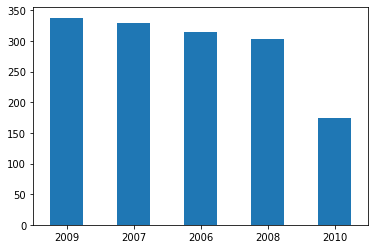

In [12]:
df['YrSold'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0);

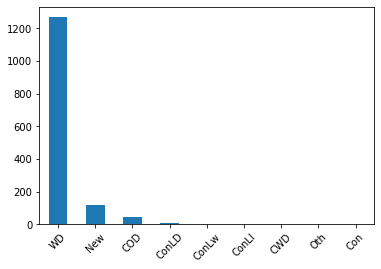

In [13]:
df['SaleType'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 45);

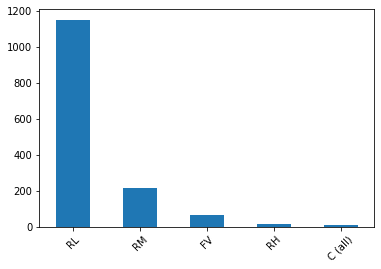

In [14]:
df[categorical_data[0]].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 45);

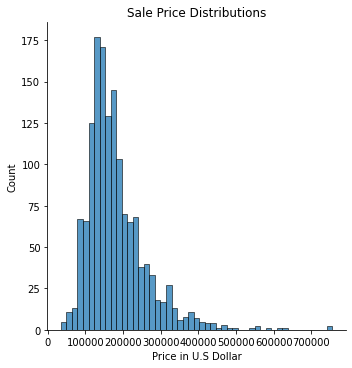

In [15]:
sns.displot(x = 'SalePrice', data = df);
plt.title('Sale Price Distributions');
plt.xlabel('Price in U.S Dollar');

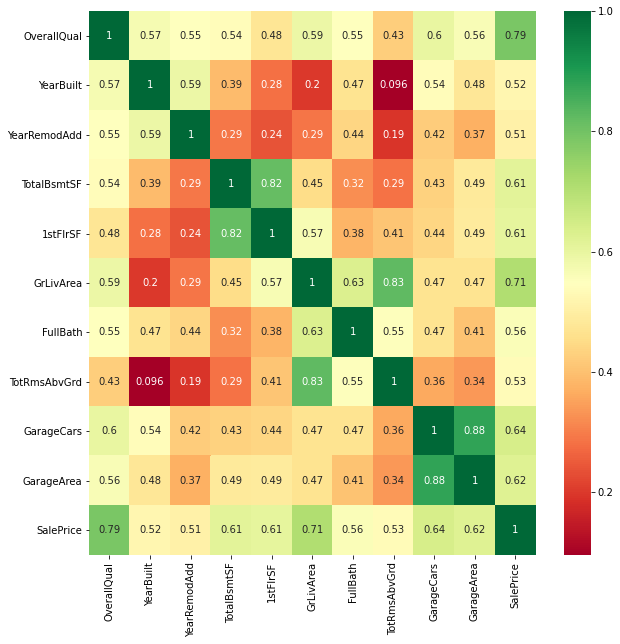

In [16]:
corrmat = df[numeric_features].corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

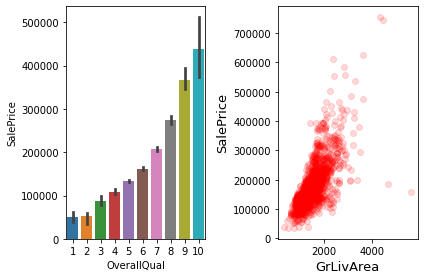

In [17]:
plt.subplot(1, 2, 1)
sns.barplot(x = 'OverallQual',  y = 'SalePrice', data = df)

plt.subplot(1, 2, 2)
plt.scatter(x = df['GrLivArea'], y = df['SalePrice'], color = 'r', alpha = 0.15)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.tight_layout()

In [18]:
show_na(df)

No missing values find


# 3. Feature Engineering

In [19]:
df_dum = pd.get_dummies(df, columns= categorical_data)

In [20]:
df_dum.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDriv

## Processing Unseen Data to match training format

In [21]:
feat = df.drop('SalePrice', axis = 1).columns

def produce_test_data(): 
    test_ = pd.read_csv('./test.csv').set_index('Id')
    test = produce_data(test_, False)
    test_dum = pd.get_dummies(test[feat], columns= [x for x in test.columns if x in categorical_data])
    diff = set(df_dum.drop('SalePrice', axis = 1)) - set(test_dum)
    for val in diff:
        test_dum[val] = 0
    
    test_dum = test_dum[df_dum.drop('SalePrice', axis = 1).columns]
    return [test_dum, test_.index]

# produce_test_data()[0]
# test_data = produce_test_data()[0]
# pred_ = fit_xgb.predict(test_data)

# 4. Modelling

In [22]:
from sklearn.model_selection import train_test_split

# Splitting into train and test data
Y = df_dum['SalePrice']
X = df_dum.drop('SalePrice', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y)

### Baseline Model

In [44]:
fit_xgb = xgb.XGBRegressor(n_estimators = 125, 
                       random_state=42).fit(X_train, y_train);

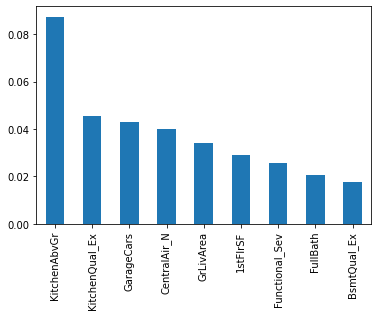

In [45]:
pd.DataFrame(data = fit_xgb.feature_importances_, index = df_dum.drop('SalePrice', axis = 1).columns,
            columns = ['Score']).sort_values('Score', ascending = False).iloc[1:10, 0].plot(kind = 'bar');

In [46]:
def evaluate_model(model, unseen_data = X_test, true_label = y_test):
    predictions = model.predict(unseen_data)
    r2 = r2_score(true_label, predictions)
    rsme = sqrt(mean_squared_error(true_label, predictions))
    
    # Print Evaluation Matrix
    print('Baseline for Extreme Gradient Boosting Models are: ')
    print('R-Squared Score: {:.2f}'.format(r2))
    print('RSME Score: {:.2f}'.format(rsme))

In [47]:
evaluate_model(fit_xgb)

Baseline for Extreme Gradient Boosting Models are: 
R-Squared Score: 0.87
RSME Score: 32379.63


### Parameter Tuning

In [48]:
train_matrix = xgb.DMatrix(X_train, label=y_train)
train_test_matrix = xgb.DMatrix(X_test, label=y_test)

In [49]:
test_matrix = xgb.DMatrix(produce_test_data()[0])

In [65]:
params_ = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

num_boost_round = 999

evallist  = [(train_test_matrix, 'eval'), (train_matrix,'train')]

model = xgb.train(
    params_,
    train_matrix,
    num_boost_round=num_boost_round,
    evals = evallist,
    early_stopping_rounds=10, verbose_eval = False
)

[21:14:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [66]:
cv_results = xgb.cv(
    params_,
    train_matrix,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[21:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,126513.343750,591.602780,126224.428125,2020.003411
1,89444.281250,465.195175,89158.171875,1352.748660
2,63340.304688,290.146707,63329.638281,1430.912654
3,45023.299219,239.205485,46325.500781,1638.368950
4,32171.870703,152.558408,34697.632813,1315.108271
5,23322.333984,95.361379,27554.888672,1338.542550
6,17355.040625,81.536626,23552.035156,931.340675
7,13468.708789,61.868057,21152.339844,785.817022
8,10967.279687,39.144086,19836.919140,708.498001
9,9438.983789,40.335279,19260.294140,711.613866


In [67]:
cv_results['test-mae-mean'].min()

18049.9851562

In [68]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [69]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params_['max_depth'] = max_depth
    params_['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params_,
        train_matrix,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10, 
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[21:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 18565.082422 for 28 rounds
CV with max_depth=9, min_child_weight=6
[21

	MAE 18151.114844000003 for 18 rounds
Best params: 11, 7, MAE: 18151.114844000003


In [70]:
params_['max_depth'] = 9
params_['min_child_weight'] = 7

In [74]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [75]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params_['subsample'] = subsample
    params_['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params_,
        train_matrix,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[12:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 18024.0583984 for 29 rounds
CV with subsample=1.0, colsample=0.9
[12:42:1

	MAE 18659.05625 for 14 rounds
CV with subsample=0.8, colsample=0.9
[12:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 18927.680469000003 for 15 rounds
CV with s

In [71]:
params_['subsample'] = 1.
params_['colsample_bytree'] = 1.

In [72]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params_['eta'] = eta
    # Run and time CV
    %time 
    cv_results = xgb.cv(
            params_,
            train_matrix,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
Wall time: 0 ns
[21:15:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:15:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:15:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:15:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:15:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 18289.759375200003 for 20 rounds

CV with eta=0.2
Wall time: 0 ns
[21:15:15] W

In [74]:
params_['eta'] = .005

In [76]:
model = xgb.train(
    params_,
    train_matrix,
    num_boost_round=num_boost_round,
    evals=[(train_test_matrix, "Test")],
    early_stopping_rounds=10, verbose_eval = False
)

[21:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [77]:
model.save_model("./xgb_tuned.model")

In [78]:
saved_model = xgb.Booster()
saved_model.load_model("./xgb_tuned.model")

[21:21:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [80]:
pred_test_train_from_tuned = saved_model.predict(train_test_matrix)
r2_xgb_tuned = r2_score(y_test, pred_test_train_from_tuned)
rsme2 = sqrt(mean_squared_error(y_test, pred_test_train_from_tuned))

# This test
print('Baseline for Extreme Gradient Boosting Models are: ')
print('R-Squared Score: {}'.format(r2_xgb_tuned))
print('RSME Score: {}'.format(rsme2))
# print('RSME reduced from tuning the model: {}'.format(rsme - rsme2))

Baseline for Extreme Gradient Boosting Models are: 
R-Squared Score: 0.8773651769341425
RSME Score: 31355.91670598949


In [81]:
pred_xgb_tuned = saved_model.predict(test_matrix)
pred_xgb_tuned

array([125760.29, 149366.92, 173906.48, ..., 163220.48, 113924.8 ,
       218539.66], dtype=float32)

### Saving Predictions

In [82]:
pd.DataFrame(pred_xgb_tuned, index = produce_test_data()[1]).rename(columns = {0:'SalePrice'}).to_csv('answer_house.csv', sep=',', 
                                                                                             encoding='utf-8')

In [83]:
pd.read_csv('./answer_house.csv')

,Id,SalePrice
0,1461,125760.290
1,1462,149366.920
2,1463,173906.480
3,1464,181196.520
4,1465,187028.360
...,...,...
1454,2915,82492.266
1455,2916,80240.360
1456,2917,163220.480
1457,2918,113924.800


# PyCaret Module For Compariosns

In [86]:
regression.setup(df, target = 'SalePrice', 
                 remove_outliers=True, 
                 n_jobs = -1)

,Description,Value
0,session_id,5111
1,Target,SalePrice
2,Original Data,"(1460, 75)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,56
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(970, 340)"


(-1,
 False,
 {'USI',
  'X',
  'X_test',
  'X_train',
  '_all_metrics',
  '_all_models',
  '_all_models_internal',
  '_available_plots',
  '_gpu_n_jobs_param',
  '_internal_pipeline',
  '_ml_usecase',
  'create_model_container',
  'data_before_preprocess',
  'display_container',
  'exp_name_log',
  'experiment__',
  'fix_imbalance_method_param',
  'fix_imbalance_param',
  'fold_generator',
  'fold_groups_param',
  'fold_param',
  'fold_shuffle_param',
  'gpu_param',
  'html_param',
  'imputation_classifier',
  'imputation_regressor',
  'iterative_imputation_iters_param',
  'log_plots_param',
  'logging_param',
  'master_model_container',
  'n_jobs_param',
  'prep_pipe',
  'pycaret_globals',
  'seed',
  'stratify_param',
  'target_param',
  'transform_target_method_param',
  'transform_target_param',
  'y',
  'y_test',
  'y_train'},
 KFold(n_splits=10, random_state=5111, shuffle=False),
 Id
 475     251000.0
 973      99500.0
 1229    367294.0
 211      98000.0
 695     141500.0
       

In [87]:
regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15175.5922,759978052.8757,25741.2956,0.8876,0.1226,0.0862,6.5820
gbr,Gradient Boosting Regressor,17335.6436,949594666.3415,28942.0357,0.8586,0.1348,0.0972,0.2830
lightgbm,Light Gradient Boosting Machine,17059.5057,935067663.4457,29193.9711,0.8584,0.1348,0.0950,0.2140
ridge,Ridge Regression,17330.8777,921988150.4000,28887.1156,0.8544,0.1451,0.0997,0.0270
rf,Random Forest Regressor,18077.5125,991939998.9742,30104.0451,0.8494,0.1432,0.1023,0.7640
xgboost,Extreme Gradient Boosting,18257.9938,1001380272.0000,30406.2957,0.8435,0.1403,0.1006,0.7440
en,Elastic Net,19929.7757,1130687363.2000,31949.2074,0.8260,0.1568,0.1148,0.0890
omp,Orthogonal Matching Pursuit,17574.6946,1115199208.6976,31087.3938,0.8146,0.1434,0.0983,0.0250
llar,Lasso Least Angle Regression,18339.0283,1110930488.4645,31575.2483,0.8116,0.1595,0.1044,0.8760
lasso,Lasso Regression,19048.8933,1158834352.0000,32375.6744,0.8038,0.1790,0.1096,0.0750


In [88]:
model = regression.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12073.8424,253108775.9258,15909.3927,0.9328,0.0907,0.0705
1,12713.5620,351772673.6654,18755.6038,0.9176,0.1121,0.0790
2,13292.6338,332479965.7349,18234.0332,0.9359,0.1254,0.0837
3,16632.7608,511292475.2451,22611.7774,0.9137,0.1155,0.0932
4,17747.1371,1018026726.8675,31906.5311,0.8859,0.1152,0.0845
5,11672.0996,289106872.1682,17003.1430,0.9155,0.1019,0.0748
6,16807.8623,1216840775.6649,34883.2449,0.8534,0.1308,0.0865
7,19179.3299,2391088787.4315,48898.7606,0.6793,0.1759,0.1081
8,15091.1411,443253694.3926,21053.5910,0.9393,0.1193,0.0897
9,16545.5531,792809781.6614,28156.8781,0.9029,0.1392,0.0920


In [ ]:
model_tuned = regression.tune_model(model)

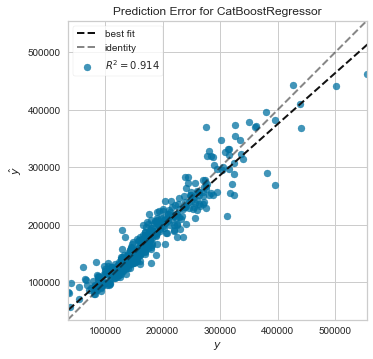

In [89]:
regression.plot_model(model, plot = 'error')

In [90]:
unseen_data = produce_data(pd.read_csv('./test.csv'), False)

### Saving Predictions

In [91]:
answer = regression.predict_model(model, unseen_data)[['Id', 'Label']]

In [92]:
answer.rename(columns={'Label': 'SalePrice'}).to_csv('./answer_pycaret.csv', index = False)

In [93]:
pd.read_csv('./answer_pycaret.csv')

,Id,SalePrice
0,1461,131582.433513
1,1462,166164.081567
2,1463,194919.196424
3,1464,201420.374650
4,1465,200125.913929
...,...,...
1454,2915,96866.665777
1455,2916,88274.622271
1456,2917,162213.008224
1457,2918,129423.117964


# Stacking Approach !

In [94]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR

def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['gbm'] = XGBRegressor()
    return models
get_models()

{'knn': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'),
 'cart': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'svm': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'gbm': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
 

In [97]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>knn -29217.076 (2640.853)
>cart -25171.331 (2257.518)
>svm -55567.459 (3578.354)
>gbm -17303.213 (1829.082)


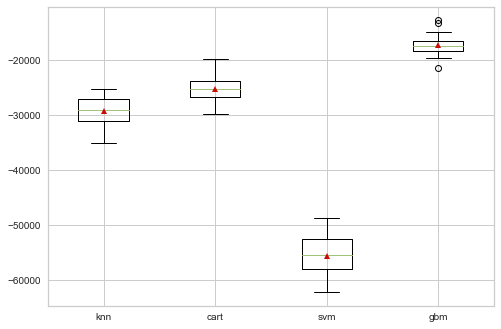

In [99]:
models = get_models()
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

plt.boxplot(results, labels = names, showmeans = True);

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    level0.append(('gbm', XGBRegressor()))
    
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['Stacking'] = get_stacking()
    return models
get_models()

{'knn': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'),
 'cart': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'svm': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'Stacking': StackingRegressor(cv=5,
                   estimators=[('knn',
                                KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                  

In [101]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>knn -29217.076 (2640.853)
>cart -25494.574 (2490.441)
>svm -55567.459 (3578.354)
>Stacking -17033.115 (1643.041)


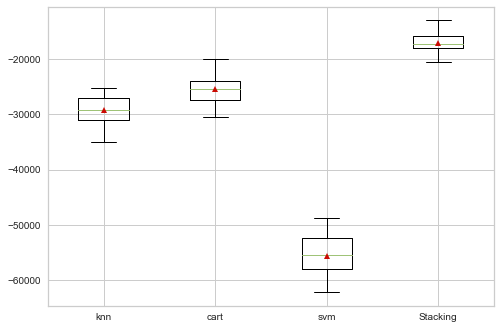

In [102]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [103]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# define the base models

level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
level0.append(('gbm', XGBRegressor(random_state=42,silent=True)))

# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
# make a prediction for one example
    #data = [[0.59332206,-0.56637507,1.34808718,-0.57054047,-0.72480487,1.05648449,0.77744852,0.07361796,0.88398267,2.02843157,1.01902732,0.11227799,0.94218853,0.26741783,0.91458143,-0.72759572,1.08842814,-0.61450942,-0.69387293,1.69169009]]
    #yhat = model.predict(data)
#print('Predicted Value: %.3f' % (yhat))

[13:14:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:14:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:14:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

StackingRegressor(cv=5,
                  estimators=[('knn',
                               KNeighborsRegressor(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                              ('cart',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                  

In [104]:
predict_stack = model.predict(X_test)

r2_stack = r2_score(y_test, predict_stack)
rsme_stack = sqrt(mean_squared_error(y_test, predict_stack))

# This test
print('R-Squared Score: {:.2f}'.format(r2_stack))
print('RSME Score: {:.2f}'.format(rsme_stack))

R-Squared Score: 0.871999316991052
RSME Score: 30515.12815630276


In [105]:
# Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 8)
results_stack = cross_val_score(model, X_train, y_train, cv = k_fold)
print("Accuracy: %.2f%% (%.2f%%)" % (results_stack.mean()*100, results_stack.std()*100))

[13:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:14:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

[13:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

[13:15:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:15:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:15:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [106]:
score = evaluate_model(model, X_test, y_test)
print('Score: %.4f%% (%.3f%%)' %(-np.mean(score), np.std(score)))

Score: 21280.4106% (3492.874%)


In [109]:
# Stacking Model Resutls
pd.DataFrame(model.predict(produce_test_data()[0]), index = produce_test_data()[0].index).rename(columns = {0:'SalePrice'}).to_csv('answer_house_stack.csv', sep=',', encoding='utf-8')

### Saving Answer

In [110]:
pd.read_csv('./answer_house_stack.csv').set_index('Id')

,SalePrice
Id,
1461,124463.459569
1462,176182.196328
1463,171019.667878
1464,195832.982306
1465,231209.448625
...,...
2915,76634.260546
2916,75820.287730
2917,180607.648259


<AxesSubplot:xlabel='Id'>

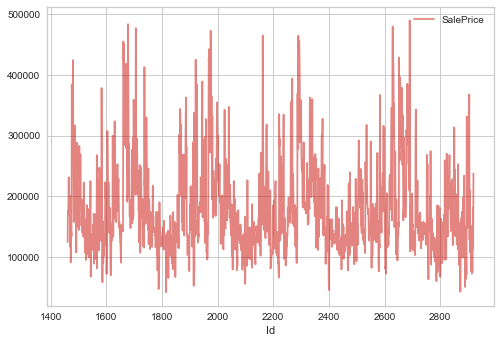

In [111]:
pd.read_csv('./answer_house_stack.csv').set_index('Id').plot(alpha = 0.5, color = 'r')